# Fetching Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option("display.max_columns", None)
df.head().T

0                  1  \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital-gains                                   53300                  0   
capital-loss                                        0                  0   
incident_date                              25-01-2015         21-01-2015   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  ?   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_state                                     SC                 VA   
incident_city                                Columbus          Riverwood   
incident_location                      9935 4th Drive       6608 MLK Hwy   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  ?   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  ?   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      Y                  Y   
_c39                                              NaN                NaN   

                                                   2  \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_state                                      OH   
policy_csl                                   100/300   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital-gains                          

In [3]:
df = df.rename(columns={'capital-gains': 'capital_gains', 'capital-loss': 'capital_loss'})
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital_gains                   338
capital_loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital_gains                     0
capital_loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

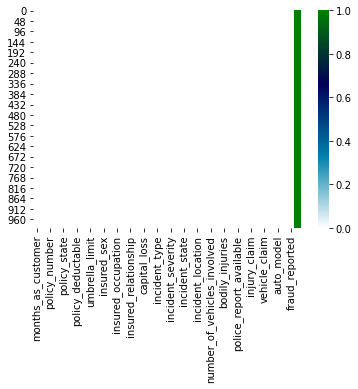

In [6]:
sns.heatmap(df.isnull(), cmap = 'ocean_r');

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df = df.drop(['_c39'], axis = 1)

Observation: Here, we drop _c39 columns was full of null values.

In [9]:
df.columns[(df == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [10]:
drop_columns = ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']
df = df.drop(drop_columns, axis = 1)
df.head()

months_as_customer  age  policy_number policy_bind_date  policy_deductable  \
0                 328   48         521585       17-10-2014               1000   
1                 228   42         342868       27-06-2006               2000   
2                 134   29         687698       06-09-2000               2000   
3                 256   41         227811       25-05-1990               2000   
4                 228   44         367455       06-06-2014               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital_gains  capital_loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted  \
0   Side Collision      Major Damage                Police   
1                ?      Minor Damage                Police   
2   Rear Collision      Minor Damage                Police   
3  Front Collision      Major Damage                Police   
4                ?      Minor Damage                  None   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y  
2       2007              N  
3       2014              Y  
4       2009              N

In [11]:
df.columns[(df == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [12]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital_gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital_loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital_gains                     0.0000       0.0   51025.000    100500.00  
capital_loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [13]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

Observation: Here, we change the value of fraud report into 0 and 1 by using replace method.

In [14]:
df['fraud_reported'].unique()

array([1, 0])

In [15]:
Fraud = df[df['fraud_reported'] == 1]
Valid = df[df['fraud_reported'] == 0]

Observation: Here, we assign 1,0 as Fraud and Valid report.

In [16]:
print('Fraud Report Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

Fraud Report Cases: 247
Valid Cases: 753


Observation: Here, we count it's lenth.

# Checking Correlation:

In [17]:
df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital_gains                          0.006399 -0.007075       0.009802   
capital_loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital_gains                         0.035212              -0.013738   
capital_loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
fraud_reported                        0.014817              -0.014480   

                             umbrella_limit  insured_zip  capital_gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital_gains                     -0.047268     0.006303       1.000000   
capital_loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

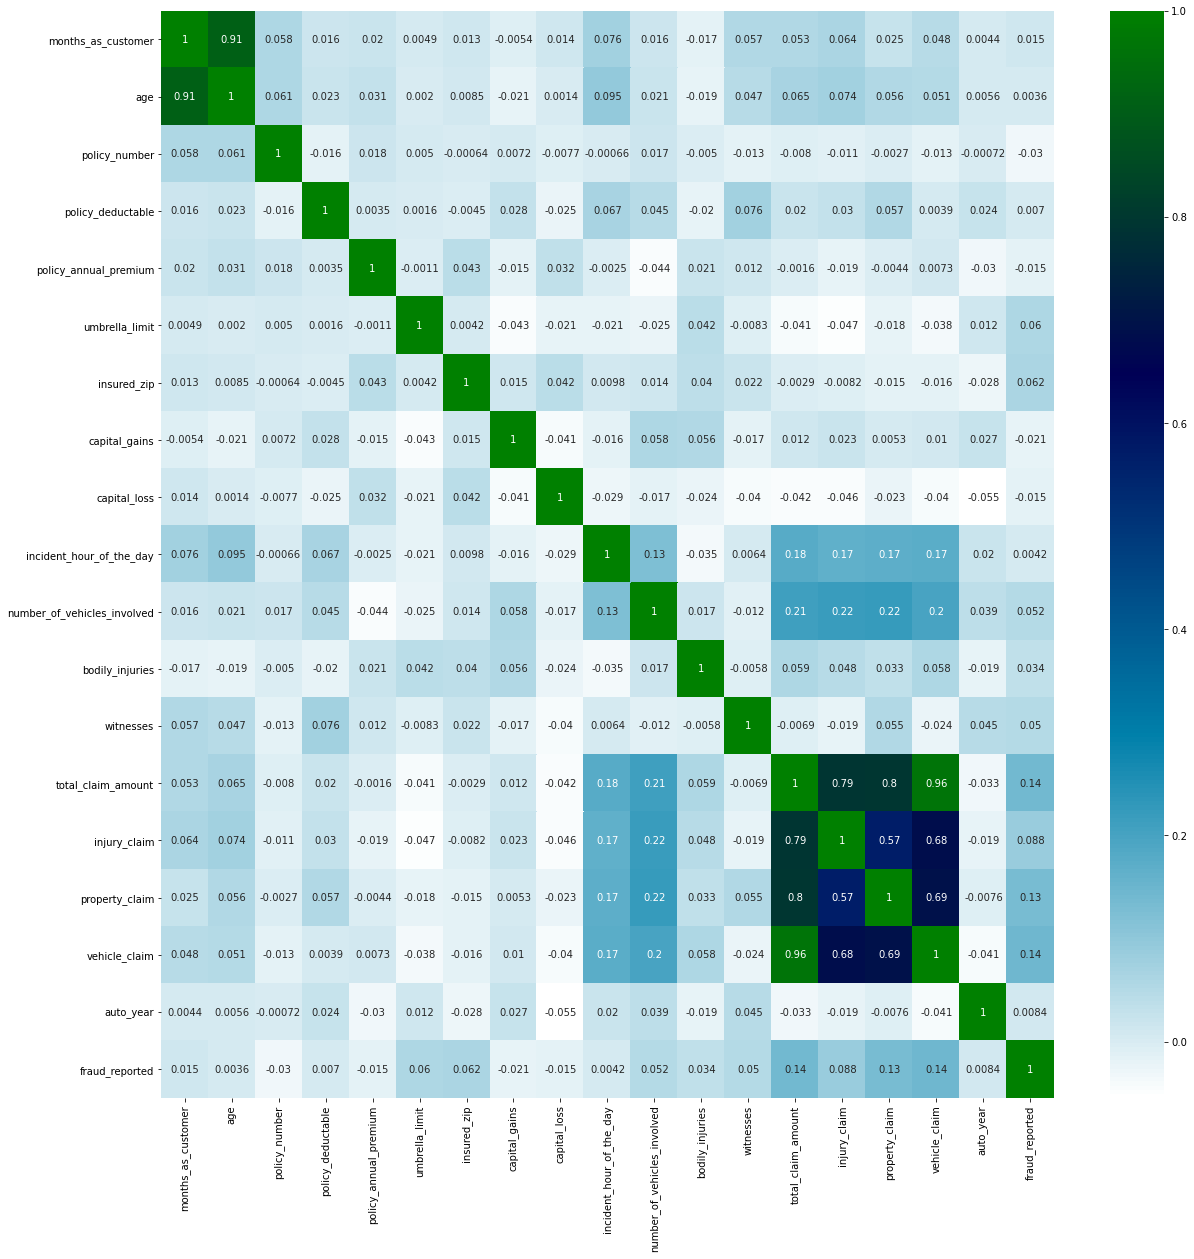

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,cmap = 'ocean_r',annot=True)

Observation: Here, we show correlation into visualization form.

In [19]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 19
Discrete feature Count 8
Continuous feature Count 11
Categorical feature Count 14


Observation: Here, we distiguish all numerical, discrete and continuous feature.

In [20]:
print(numerical_feature)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital_gains', 'capital_loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


In [21]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [22]:
randomsampleimputation(df, "bodily_injuries")
randomsampleimputation(df, "witnesses")
randomsampleimputation(df, "total_claim_amount")
randomsampleimputation(df, "injury_claim")

In [23]:
df.T

0                  1    \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital_gains                                   53300                  0   
capital_loss                                        0                  0   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  ?   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  ?   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  ?   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      1                  1   

                                                 2    \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital_gains                                  35100   
capital_loss                                       0   
incident_type                Multi-vehicle Collision   
collision_type                        Rear Collision   
incident_severity                       Minor Damage   
authorities_contacted                         Police   
incident_hour_of_the_day                           7   
number_of_vehicles_involved                        3   
property_damage                                   NO   
bodily_injuries                                    2   
witnesses                                          3   
police_report_available                           NO   
total_cla

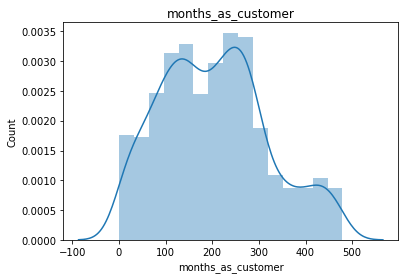

<Figure size 1080x1080 with 0 Axes>

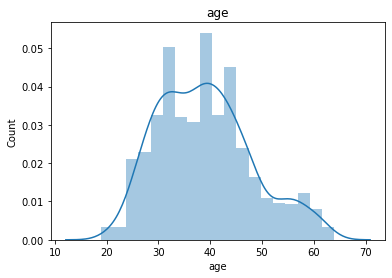

<Figure size 1080x1080 with 0 Axes>

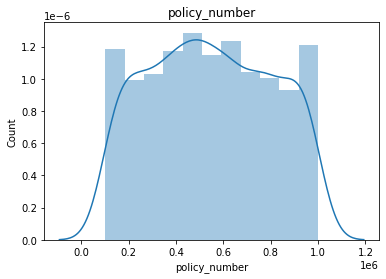

<Figure size 1080x1080 with 0 Axes>

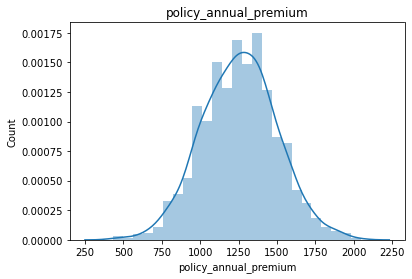

<Figure size 1080x1080 with 0 Axes>

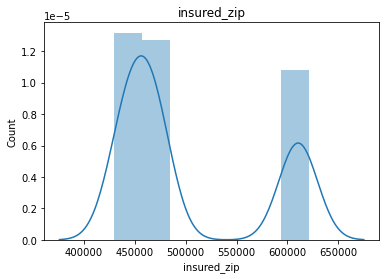

<Figure size 1080x1080 with 0 Axes>

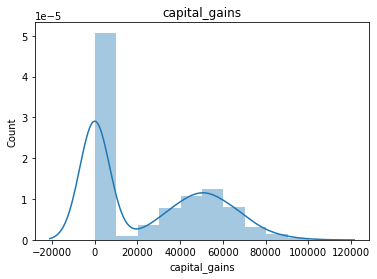

<Figure size 1080x1080 with 0 Axes>

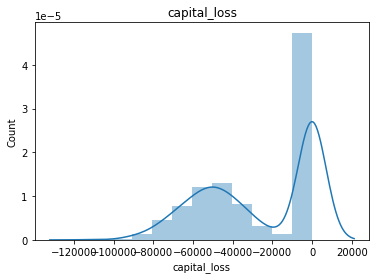

<Figure size 1080x1080 with 0 Axes>

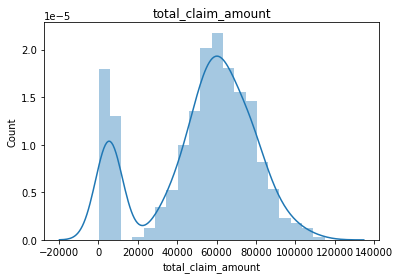

<Figure size 1080x1080 with 0 Axes>

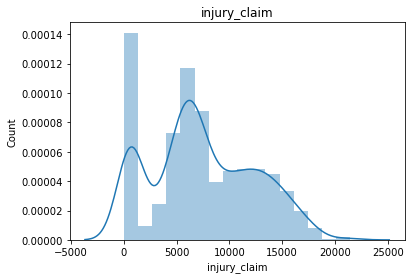

<Figure size 1080x1080 with 0 Axes>

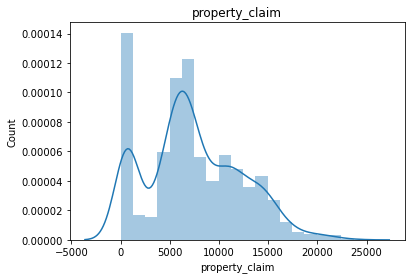

<Figure size 1080x1080 with 0 Axes>

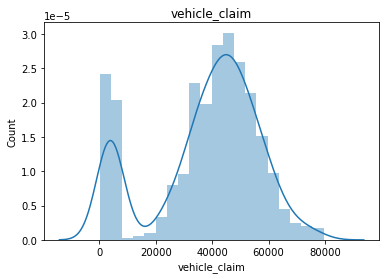

<Figure size 1080x1080 with 0 Axes>

In [24]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

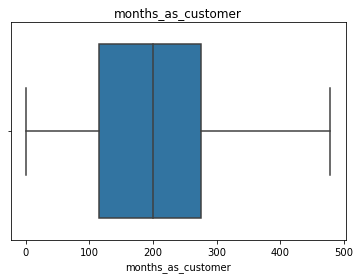

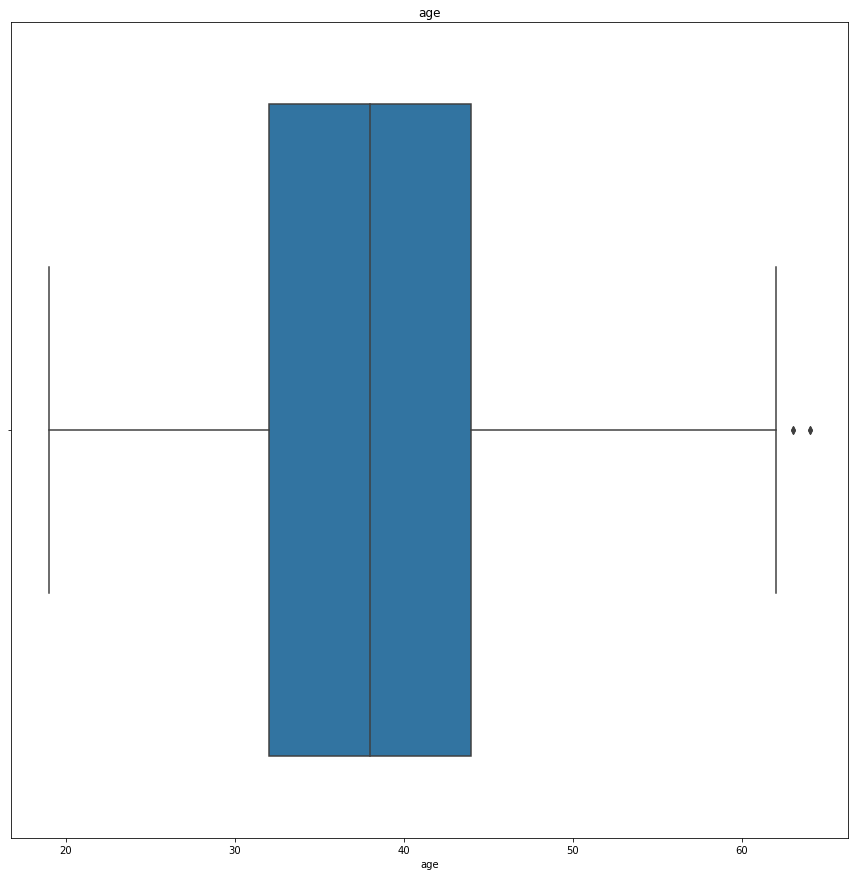

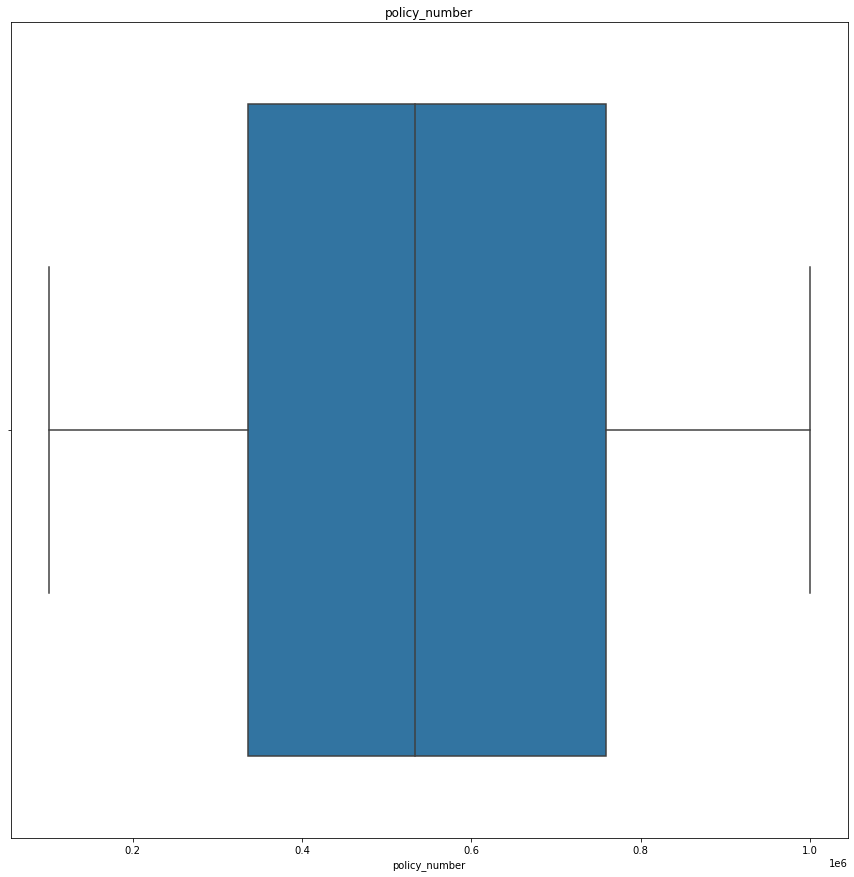

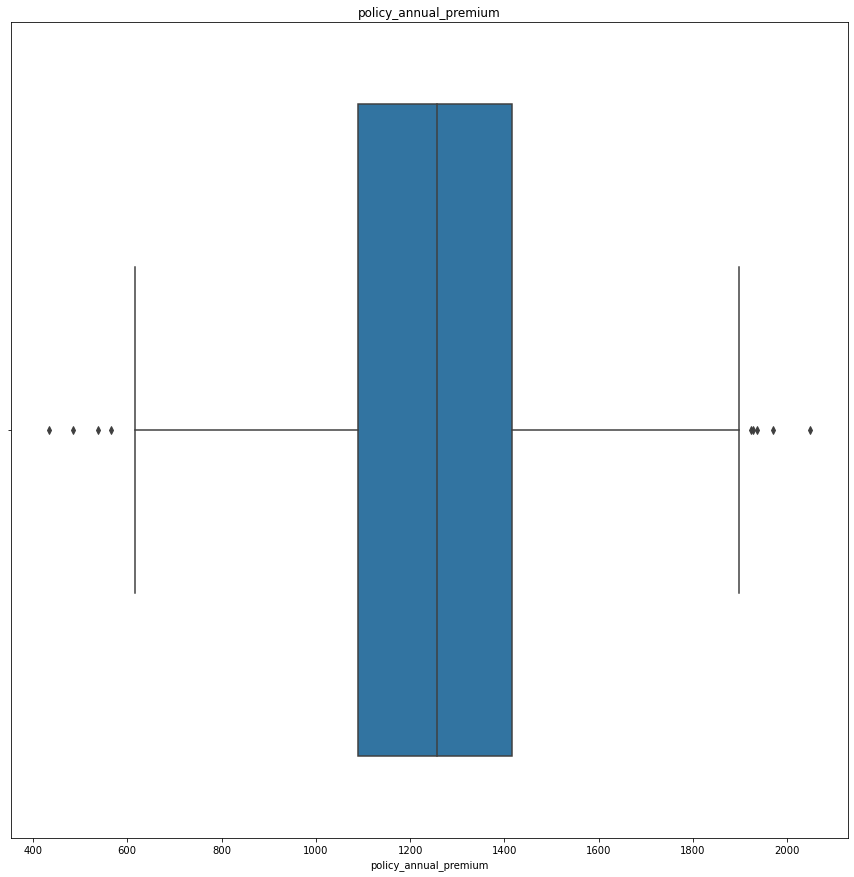

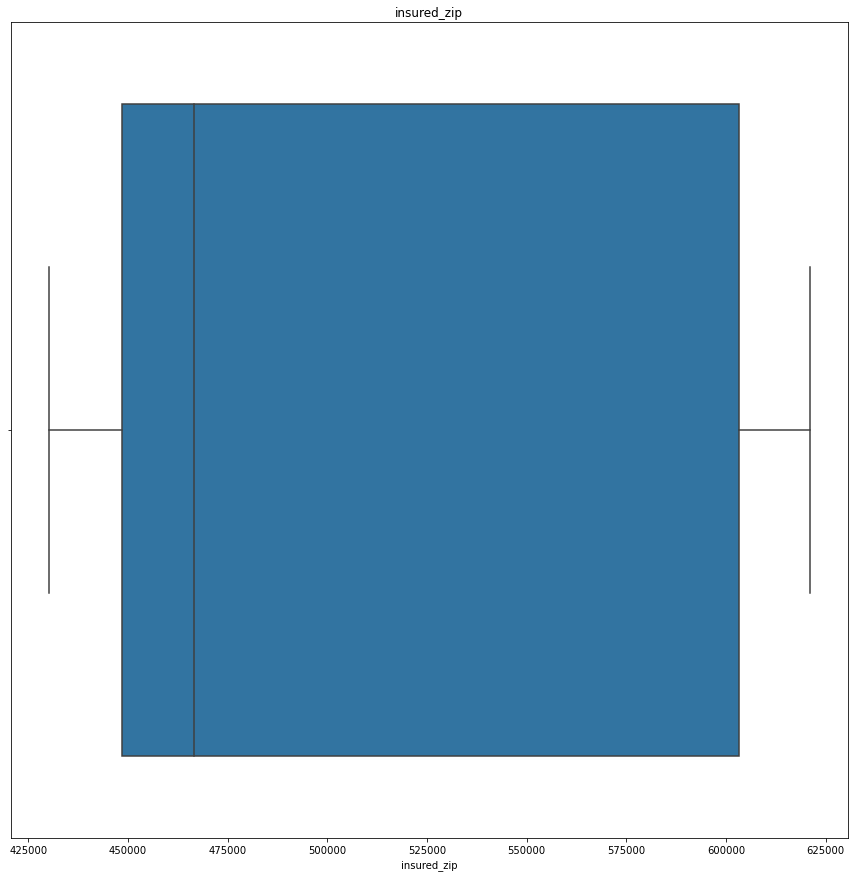

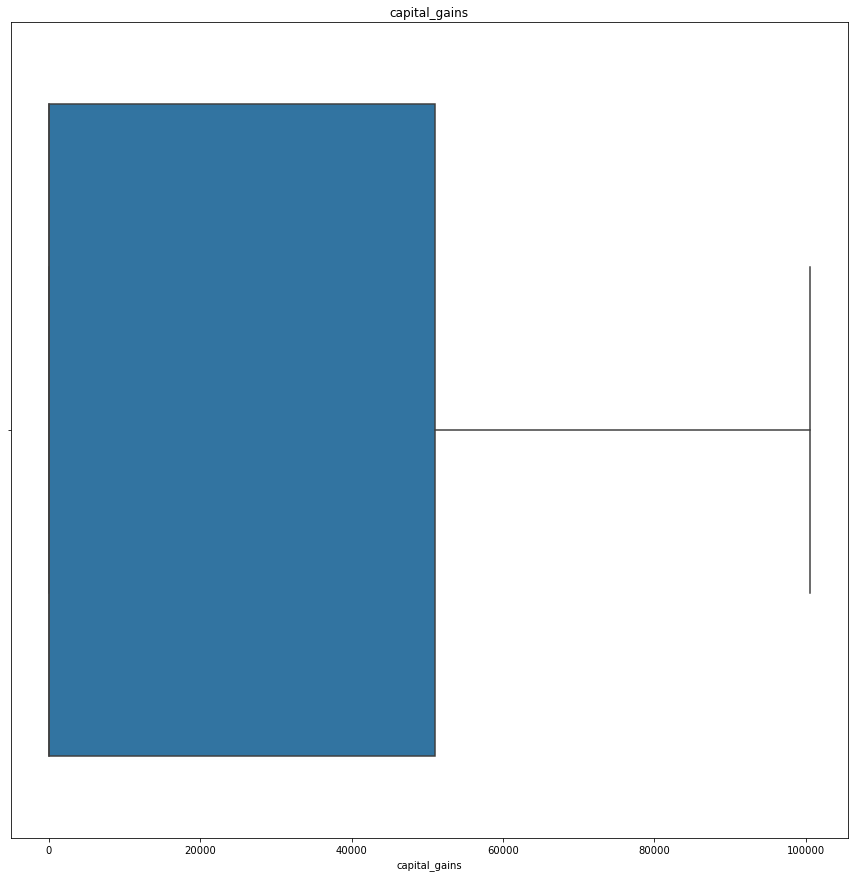

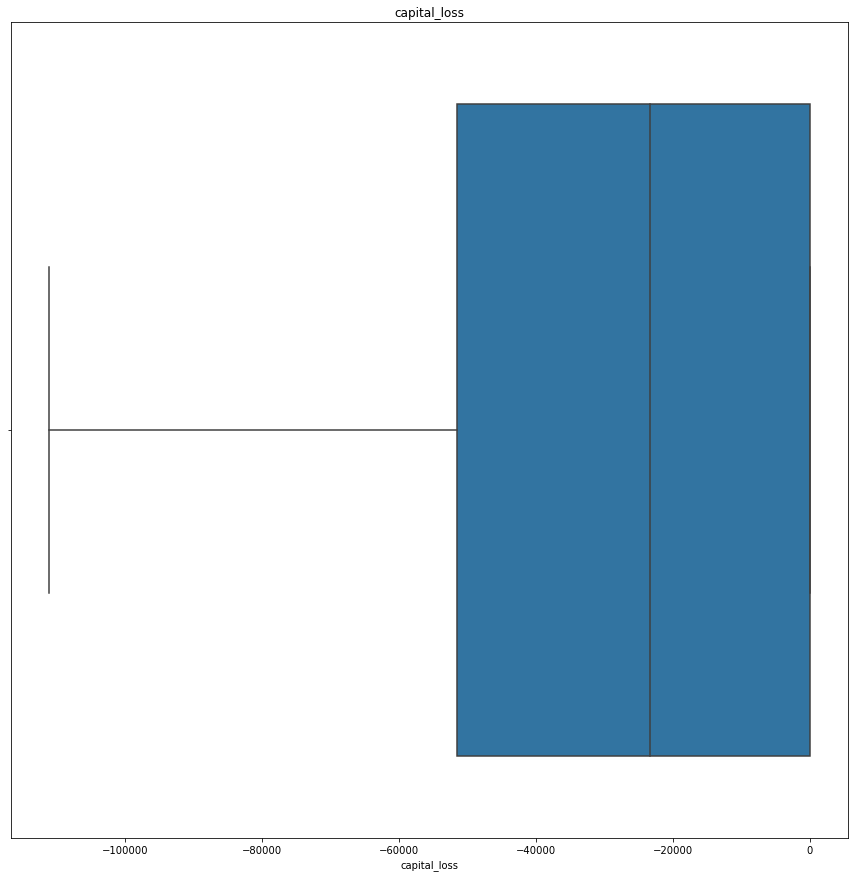

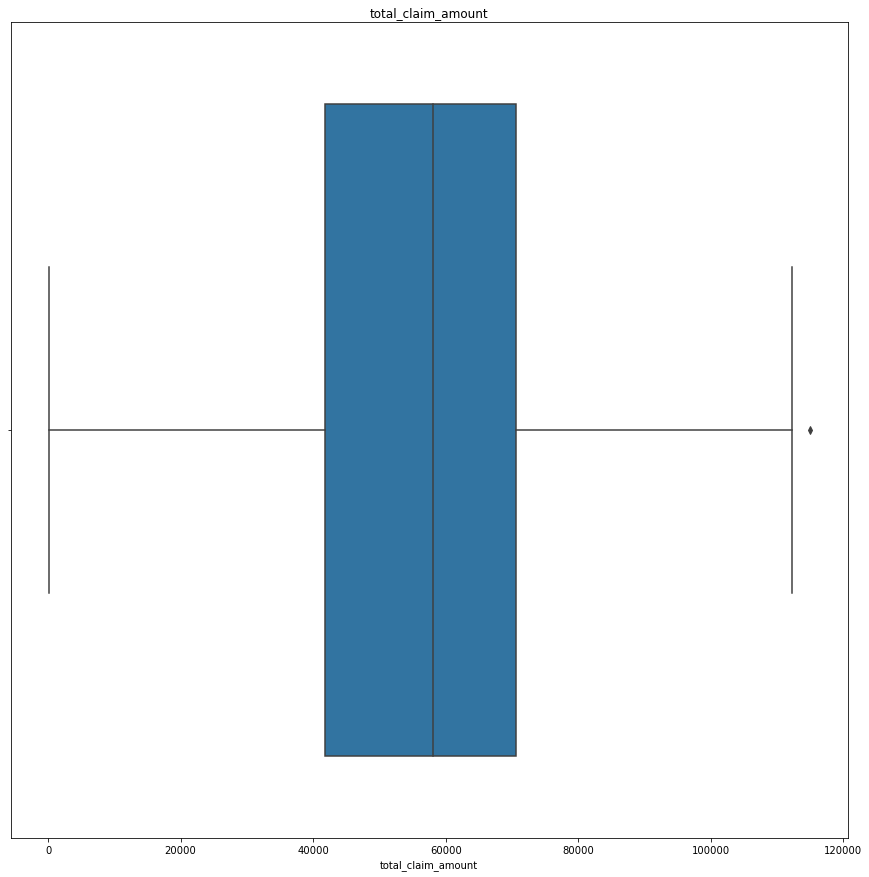

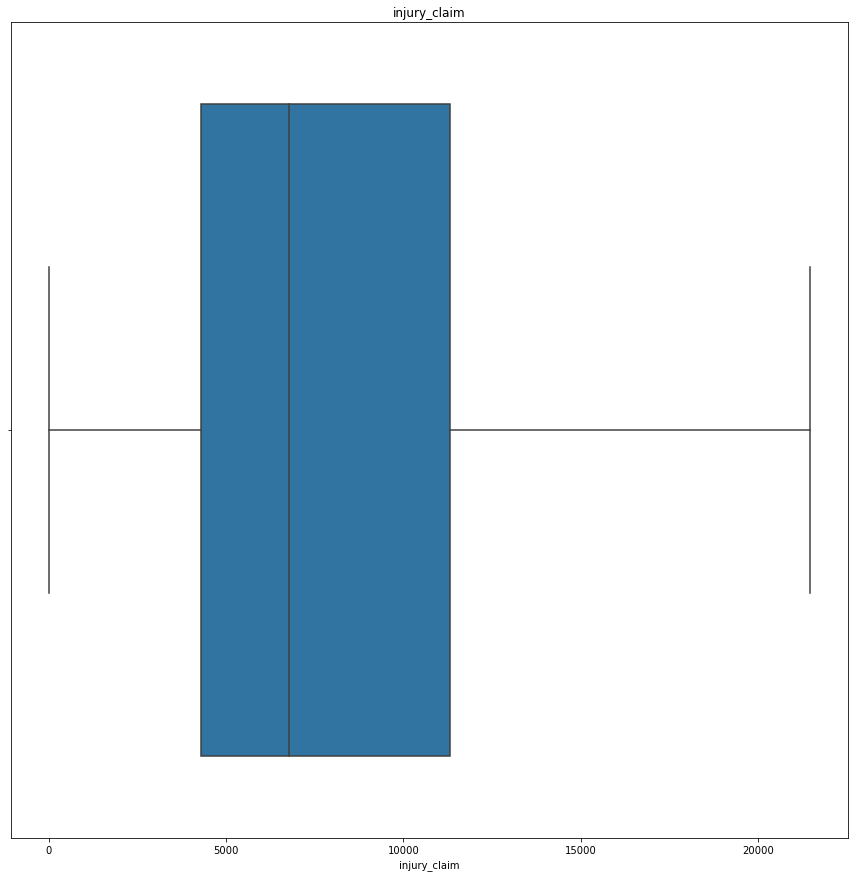

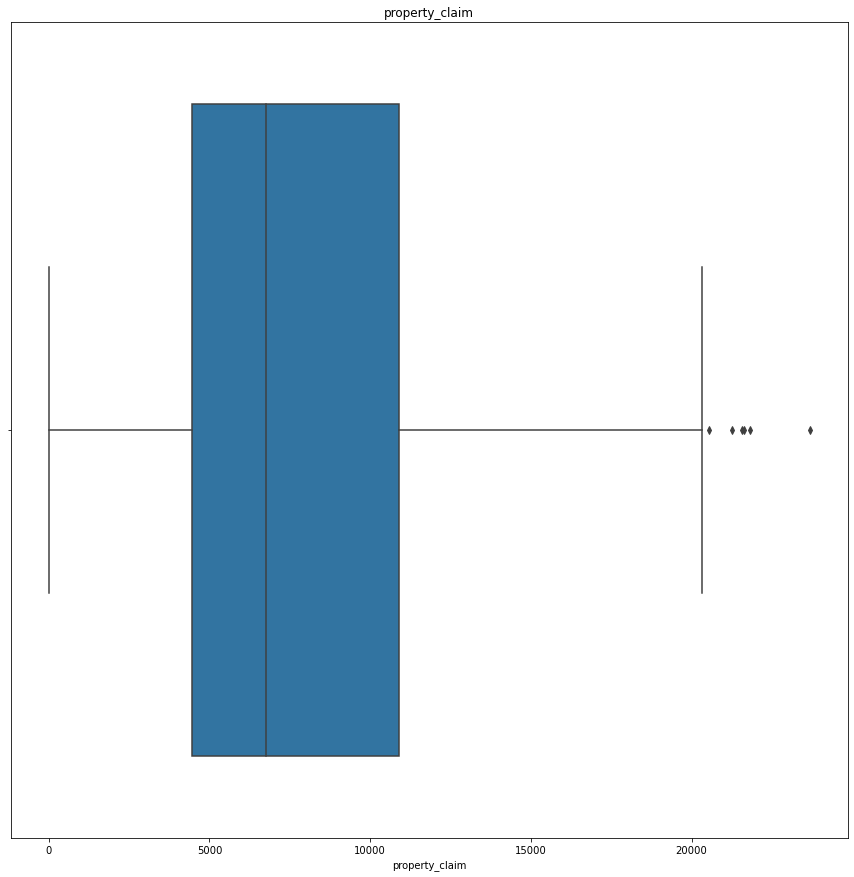

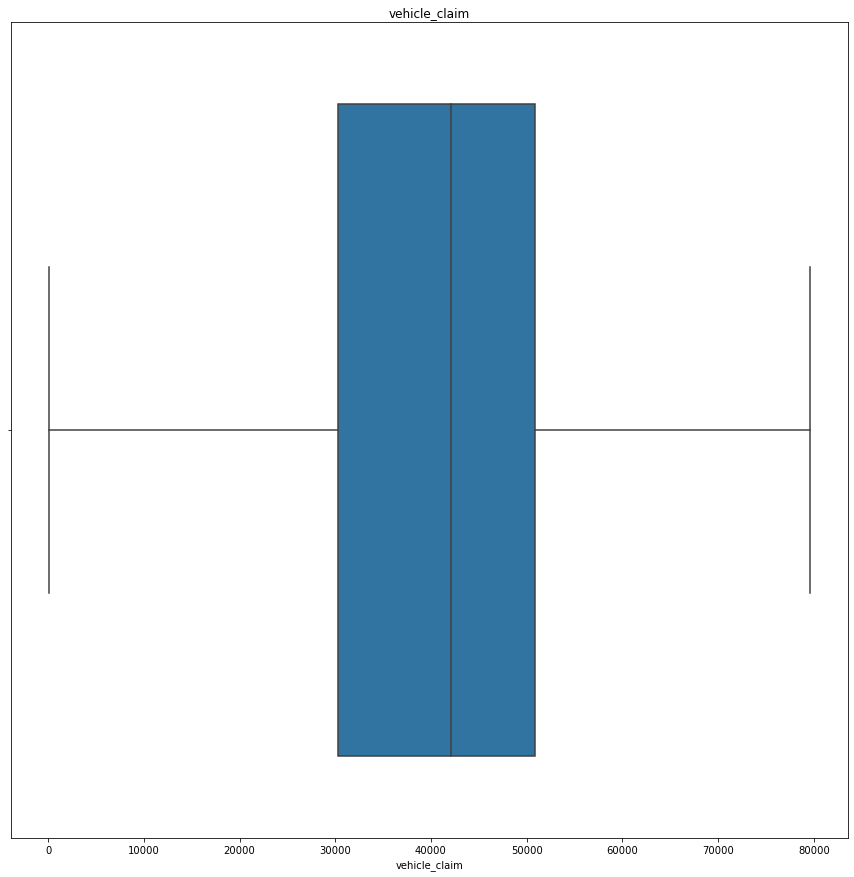

<Figure size 1080x1080 with 0 Axes>

In [25]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [26]:
df = df.replace('?', '0')

In [27]:
df.T

0                  1    \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital_gains                                   53300                  0   
capital_loss                                        0                  0   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  0   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  0   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  0   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      1                  1   

                                                 2    \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital_gains                                  35100   
capital_loss                                       0   
incident_type                Multi-vehicle Collision   
collision_type                        Rear Collision   
incident_severity                       Minor Damage   
authorities_contacted                         Police   
incident_hour_of_the_day                           7   
number_of_vehicles_involved                        3   
property_damage                                   NO   
bodily_injuries                                    2   
witnesses                                          3   
police_report_available                           NO   
total_cla

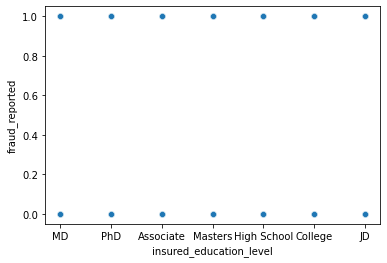

In [28]:
sns.scatterplot('insured_education_level','fraud_reported', data = df);

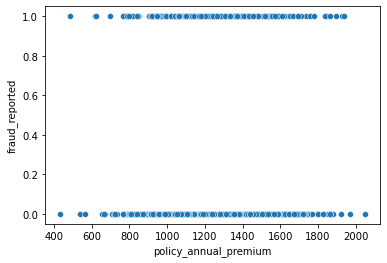

In [29]:
sns.scatterplot('policy_annual_premium','fraud_reported', data = df);

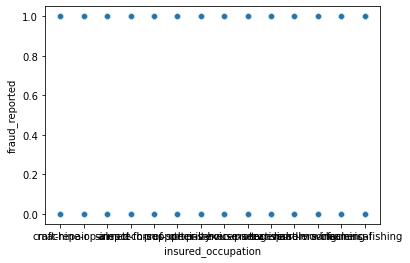

In [30]:
sns.scatterplot('insured_occupation','fraud_reported', data = df);

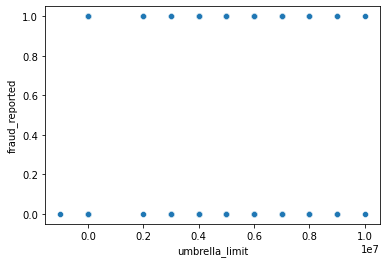

In [31]:
sns.scatterplot('umbrella_limit','fraud_reported', data = df);

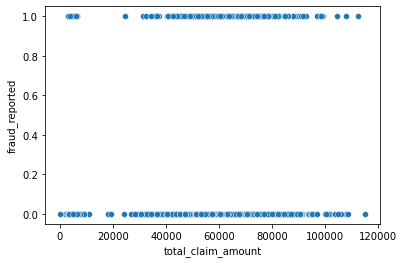

In [32]:
sns.scatterplot('total_claim_amount','fraud_reported', data = df);

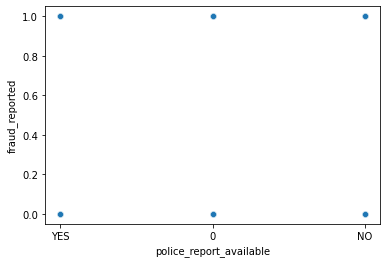

In [33]:
sns.scatterplot('police_report_available','fraud_reported', data = df);

In [34]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital_gains', 'capital_loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

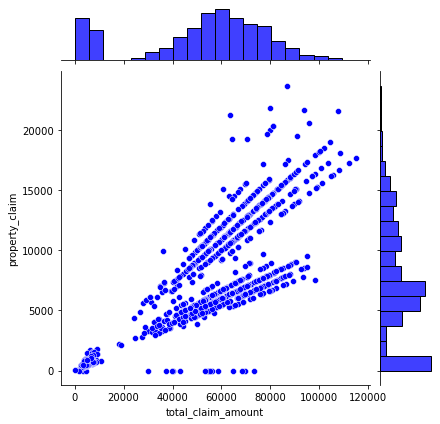

In [35]:
sns.jointplot(x='total_claim_amount',y='property_claim',data=df, color='blue');

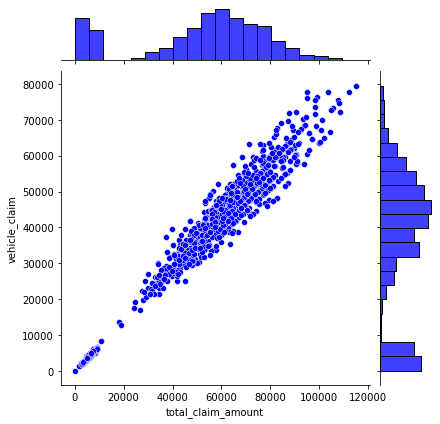

In [36]:
sns.jointplot(x='total_claim_amount',y='vehicle_claim',data=df, color='blue');

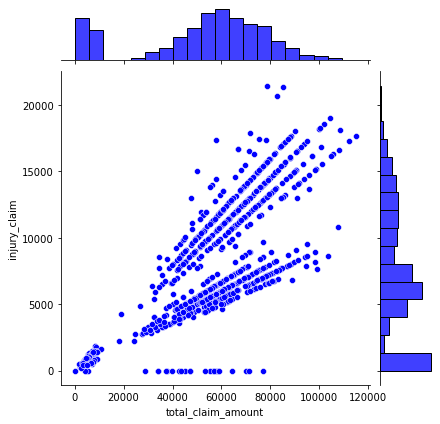

In [37]:
sns.jointplot(x='total_claim_amount',y='injury_claim',data=df, color='blue');

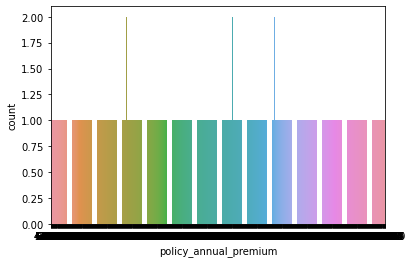

In [38]:
sns.countplot(x='policy_annual_premium',data=df);

In [39]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital_gains', 'capital_loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [40]:
df.drop(['policy_bind_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [41]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 90)


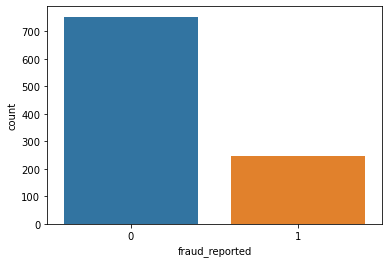

In [42]:
sns.countplot(x='fraud_reported',data=df);

Text(0.5, 1.0, 'vehicle claim in particular age')

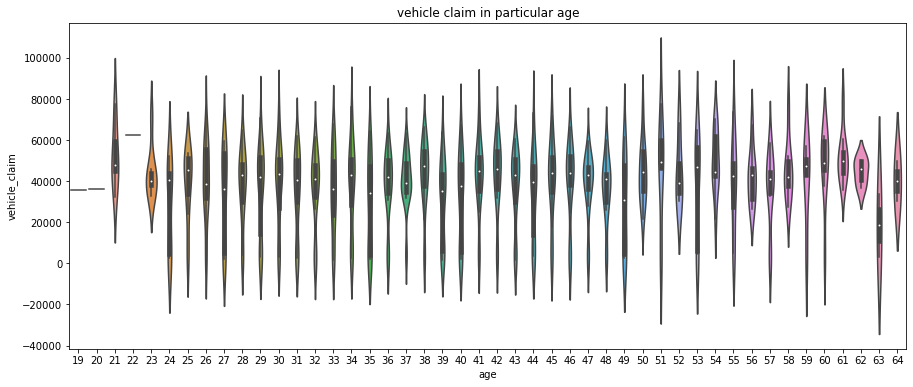

In [43]:
plt.figure(figsize = (15, 6))
sns.violinplot(x = 'age', y = 'vehicle_claim', data = df)

plt.title('vehicle claim in particular age')

# Data Processing:

In [44]:
x= df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [45]:
x.shape

(1000, 89)

In [46]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 0.1320716513940991
RMSE : 0.3634166360998064
r2 score : 0.2542538035341667


In [50]:
algorithmPerfomanceDict = {}

In [51]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
logisticRegressionScore = lr.score(x_test, y_test)
print("Score of Logistic Regression : {0}".format(logisticRegressionScore))
algorithmPerfomanceDict['LogisticRegression'] = logisticRegressionScore

Score of Logistic Regression : 0.7766666666666666


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(x_train, y_train)
knnScore = knn.score(x_test, y_test)
print("Score of KNN Regression : {0}".format(knnScore))
algorithmPerfomanceDict['KNeighborsClassifier'] = knnScore

Score of KNN Regression : 0.64


In [54]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)
naiveBayesScore = nb.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ", naiveBayesScore)
algorithmPerfomanceDict['NaiveBayesClassifier'] = naiveBayesScore

Accuracy of Naive Bayes Classifier is :  0.62


In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
decisionTreeScore = dtc.score(x_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)
algorithmPerfomanceDict['DecisionTreeClassifier'] = decisionTreeScore

Accuracy of Decision Tree Classifier is :  0.77


In [56]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(x_train, y_train)
randomForestScore = rfc.score(x_test, y_test)
print("Accuracy of Random Forest Classifier is : ", randomForestScore)
algorithmPerfomanceDict['RandomForestClassifier'] = randomForestScore

Accuracy of Random Forest Classifier is :  0.7933333333333333


In [57]:
algorithmPerfomanceDict

{'LogisticRegression': 0.7766666666666666,
 'KNeighborsClassifier': 0.64,
 'NaiveBayesClassifier': 0.62,
 'DecisionTreeClassifier': 0.77,
 'RandomForestClassifier': 0.7933333333333333}

In [58]:
comparisonData = pd.DataFrame.from_dict(algorithmPerfomanceDict, orient = 'index', columns = ["Accuracy"])
comparisonData.head()

Accuracy
LogisticRegression      0.776667
KNeighborsClassifier    0.640000
NaiveBayesClassifier    0.620000
DecisionTreeClassifier  0.770000
RandomForestClassifier  0.793333

# Save the model:

In [59]:
import pickle
file = open('Automobile_insurance_fraud.pkl', 'wb')

pickle.dump('Automobile_insurance_fraud', file)

In [60]:
model = open('Automobile_insurance_fraud.pkl', 'rb')
rfc = pickle.load(model)
rfc

EOFError: Ran out of input